In [1]:
import tensorflow as tf

D:\New folder\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\New folder\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\New folder\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\New folder\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type

In [3]:
const_1 = tf.constant(value=[5.0],
                      dtype=tf.float32,
                      shape=(1,),
                      name='const_1',
                      verify_shape=True)
print(const_1)

Tensor("const_1_1:0", shape=(1,), dtype=float32)


In [4]:
var_1 = tf.Variable(initial_value=[1.0],
                    trainable=True, 
                    collections=None,
                    validate_shape=True,
                    caching_device=None,
                    name='var_1',
                    variable_def=None, 
                    dtype=tf.float32,
                    expected_shape=(1,),
                    import_scope=None)
print(var_1)

<tf.Variable 'var_1:0' shape=(1,) dtype=float32_ref>


In [5]:
placeholder_1 = tf.placeholder(dtype=tf.float32,
                              shape=(1,),
                              name='placeholder_1')
print(placeholder_1)

Tensor("placeholder_1:0", shape=(1,), dtype=float32)


In [6]:
session = tf.Session()

In [7]:
print(session.run(const_1))

[5.]


In [9]:
init = tf.global_variables_initializer()
session.run(init)
print(session.run(var_1))

[1.]


In [10]:
print(session.run([const_1,var_1]))

[array([5.], dtype=float32), array([1.], dtype=float32)]


In [13]:
print(session.run(placeholder_1,feed_dict={placeholder_1:[10.0]}))

[10.]


In [14]:
result = const_1 + 5
print(session.run(result))

[10.]


In [15]:
result = tf.add(const_1,5,name='add_node')
print(result)

Tensor("add_node:0", shape=(1,), dtype=float32)


In [16]:
print(session.run(result))

[10.]


In [18]:
result = placeholder_1 + 10
print(session.run(result,feed_dict={placeholder_1:[10.0]}))

[20.]


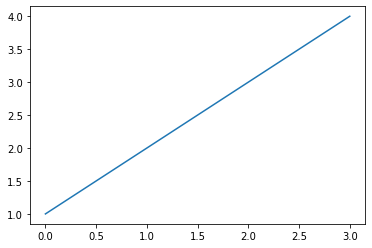

In [19]:
import matplotlib.pyplot as plt
x_train = [0.0,1.0,2.0,3.0]
y_train = [1.0,2.0,3.0,4.0]

plt.plot(x_train,y_train)
plt.show()

In [20]:
#y = m*x+b
m = tf.Variable(initial_value=[0.5],dtype=tf.float32)
b = tf.Variable(initial_value=[0.5],dtype=tf.float32)

In [21]:
x_input = tf.placeholder(dtype=tf.float32)
y_input = tf.placeholder(dtype=tf.float32)

In [22]:
y_output = tf.add(tf.multiply(m, x_input),b)

In [23]:
loss = tf.reduce_sum(input_tensor=tf.square(x=y_output-y_input))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)#extra percision w 0.01
train_step = optimizer.minimize(loss=loss)

In [26]:
session = tf.Session()
session.run(tf.global_variables_initializer())
print(session.run(loss,feed_dict={x_input:x_train,y_input:y_train}))
for _ in range(1000):
    session.run(train_step,feed_dict={x_input:x_train,y_input:y_train})
print(session.run([loss,m,b],feed_dict={x_input:x_train,y_input:y_train}))

7.5
[4.465761e-12, array([1.000001], dtype=float32), array([0.9999983], dtype=float32)]


In [28]:
model_output = session.run(y_output,feed_dict={x_input: x_train})

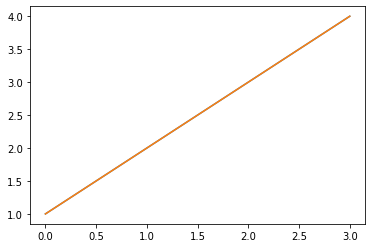

In [31]:
plt.plot(x_train,model_output)
plt.plot(x_train,y_train)
plt.show()